# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from lightgbm import LGBMClassifier

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner, util

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [2]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### LightGBM

In [3]:
lgbm_model = LGBMClassifier(
    objective='binary',
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

In [4]:
param_distributions_lgbm = {
    'num_leaves': [20, 31, 40, 50, 60, 70],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [-1, 5, 10, 15, 20],
    'min_child_samples': [10, 20, 30, 40, 50],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.05, 0.1],
    'reg_lambda': [0, 0.01, 0.05, 0.1],
}

In [5]:
df_lgbm, model_lgbm, results_lgbm, df_iter = runner.search_params(
    model=lgbm_model,
    params=param_distributions_lgbm,
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    model_name="lightgbm",
    max_combinations=20,
    stop_iter=10,
    load_existing_model=False,
    save=True
)

[LightGBM] [Info] Number of positive: 8157, number of negative: 11364
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 19521, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417858 -> initscore=-0.331574
[LightGBM] [Info] Start training from score -0.331574


Cross-Validation (5-folds):   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 6525, number of negative: 9091
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 15616, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417841 -> initscore=-0.331644
[LightGBM] [Info] Start training from score -0.331644
[LightGBM] [Info] Number of positive: 6525, number of negative: 9092
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1583
[LightGBM] [Info] Number of data points in the train set: 15617, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.417814 -> initscore=-0.331754
[LightGBM] [Info] Start training from score -0.331754
[LightGBM] [Info] 

In [9]:
util.show_results(results_lgbm)

Resultados do Modelo: lightgbm

Tempo da Busca de Parâmetros: 43.170s
Melhores Parâmetros Encontrados: {'subsample': 0.6, 'reg_lambda': 0.01, 'reg_alpha': 0, 'num_leaves': 40, 'n_estimators': 250, 'min_child_samples': 20, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 0.9}

Tempo de Treinamento: 43.170s
Média de Memória Utilizada: -1.35 MB
Pico de Memória Utilizada: 9.91 MB


In [6]:
df_lgbm

,K,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
1,2,0.914332,0.978506,0.917264,0.979381,0.900585,0.975273,0.896446,0.973180,"[0.0, 0.06778169014084508, 1.0]","[0.0, 0.8964460784313726, 1.0]"
2,3,0.911243,0.978969,0.914191,0.979894,0.896891,0.975880,0.893317,0.973337,"[0.0, 0.0708315002199736, 1.0]","[0.0, 0.8933169834457388, 1.0]"
4,5,0.907871,0.978468,0.911373,0.979638,0.893144,0.975531,0.886573,0.971345,"[0.0, 0.0708315002199736, 1.0]","[0.0, 0.8865726548129982, 1.0]"
0,1,0.905973,0.978725,0.909347,0.979636,0.890875,0.975572,0.885417,0.973180,"[0.0, 0.07347118345798505, 1.0]","[0.0, 0.8854166666666666, 1.0]"
3,4,0.904098,0.979753,0.907787,0.980278,0.888752,0.976406,0.881668,0.976555,"[0.0, 0.07347118345798505, 1.0]","[0.0, 0.8816676885346413, 1.0]"


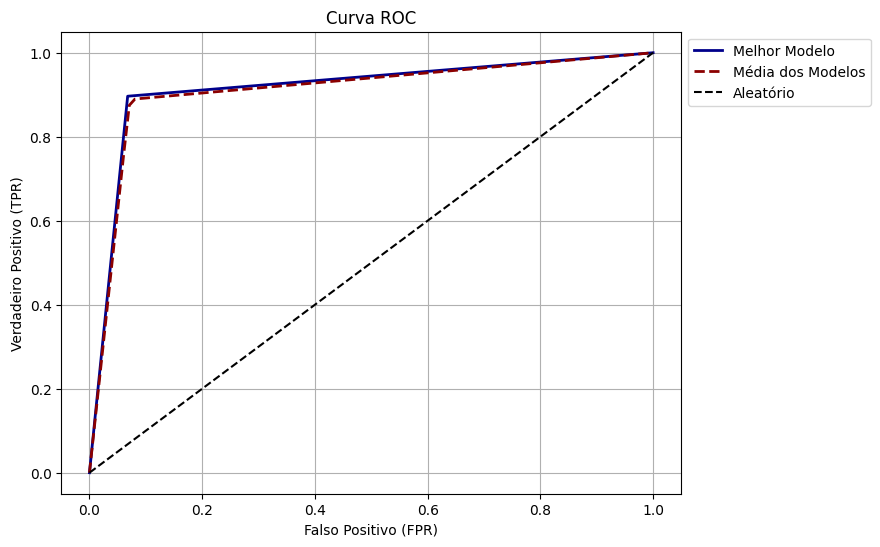

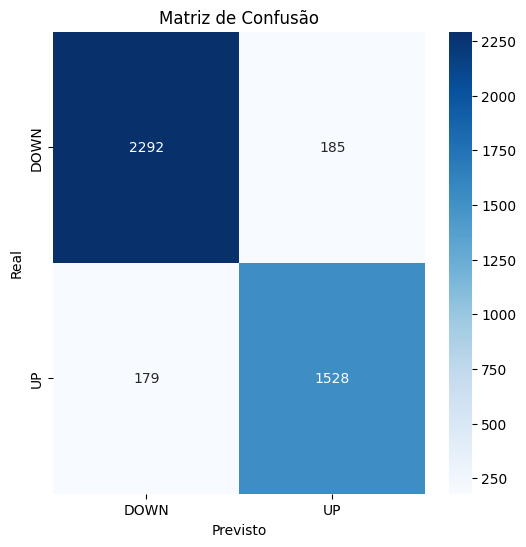

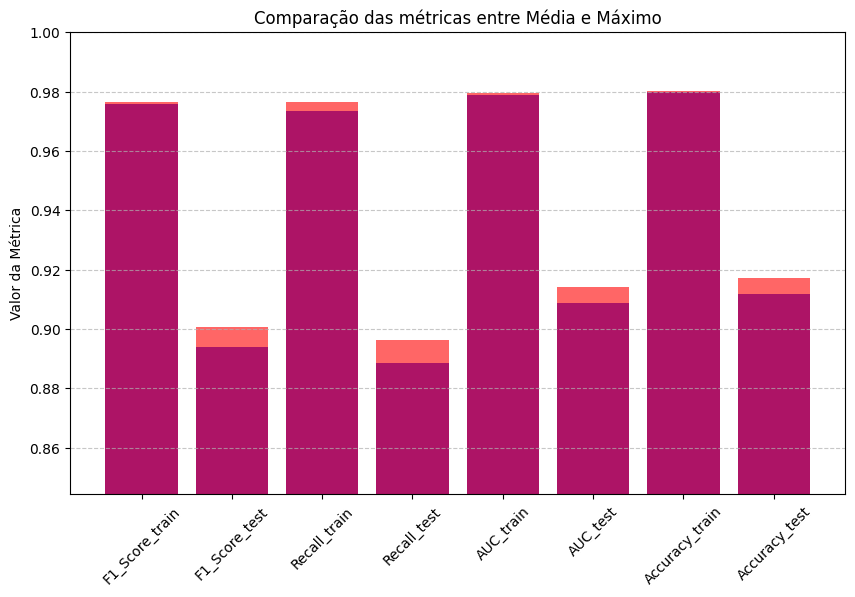

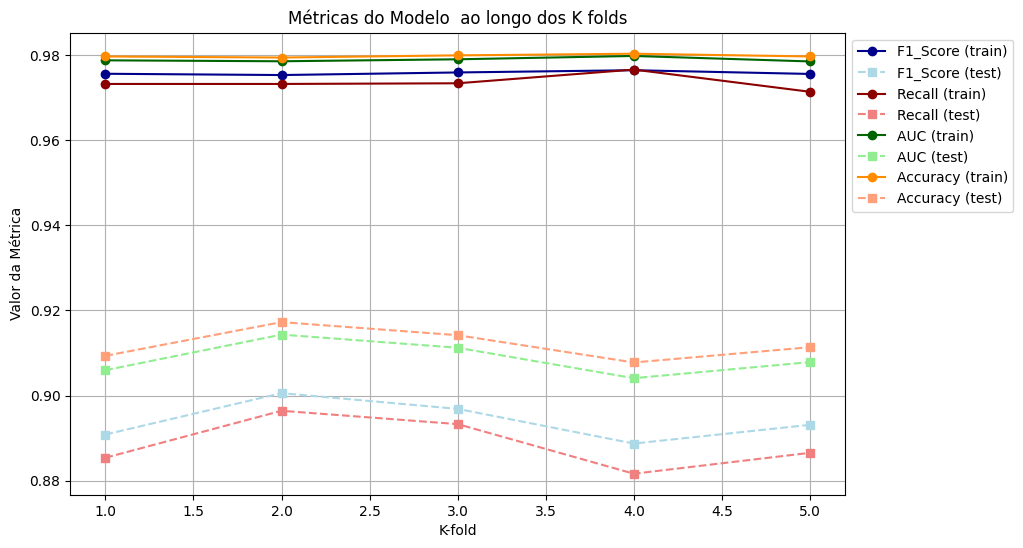

In [7]:
plots.show_roc(df_lgbm)
plots.show_confusion_matrix(model_lgbm, X_test, Y_test)
plots.show_bar_metrics(df_lgbm)
plots.show_metrics(df_lgbm)

In [10]:
df_iter